# 3.15.x Final Assignment

### Assignment Instructions

#### Part 1   |   Standard Difficulty Level

In this first part, you will be working with a datasets containing information of over 20k Software Professionals with different variables like: 

- the `Rating` of the company given by the employee,
- the `Company Name`, 
- the `Job Title` of the employee, 
- the employee `Salary` (in Indian Rupee ₹), 
- the number of `Salaries Reported`, 
- the `Location` of the company, 
- the `Employment Status` and
- the category of the `Job Roles` 

The dataset name is `Software Professionals Salary.xlsx` and you will find it in the `data` folder of this repository. At [this link](https://www.kaggle.com/datasets/iamsouravbanerjee/software-professional-salaries-2022?search=salary) you can find the source of the data (Kaggle) as well as more information on its composition. 

**Setup:** Import the necessary libraries and load the .csv file to a DataFrame named `sps`. Check that all columns have the correct data type. 

In [3]:
import pandas as pd
import numpy as np
import requests

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

sps = pd.read_excel('data/Software Professionals Salary.xlsx')
sps.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


1. What is the shape (rows, cols) of the `sps` DataFrame? 

In [4]:
sps.shape

(22770, 8)

2. How many unique `Job Roles` are there in the dataset? 

In [5]:
sps['Job Roles'].unique()

array(['Android', 'Backend', 'Database', 'Frontend', 'IOS', 'Java',
       'Mobile', 'SDE', 'Python', 'Web', 'Testing'], dtype=object)

3. How many unique `Job Title` are there for the "Python" `Job Role`? 

In [6]:
sps_2 = sps[sps["Job Roles"] == "Python"]
sps_2

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
10896,3.9,Tata Consultancy Services,Python Developer,200000,26,Bangalore,Full Time,Python
10897,3.8,Wipro,Python Developer,200000,10,Bangalore,Full Time,Python
10898,3.8,Capgemini,Python Developer,300000,9,Bangalore,Full Time,Python
10899,3.3,Infosys,Python Developer,200000,8,Bangalore,Full Time,Python
10900,4.1,Fresher,Python Developer,120000,7,Bangalore,Full Time,Python
...,...,...,...,...,...,...,...,...
11857,4.9,Datalysys,Python/Data Engineer,400000,1,Hyderabad,Full Time,Python
11858,4.1,Innvectra Info Solutions,Python Developer/Nodejs Developer,800000,1,Hyderabad,Full Time,Python
11859,3.3,PUJA DENTAL GROUP,C and Python Developer,216000,1,Hyderabad,Full Time,Python
11860,4.1,IBM,Python and Shell Scripting Developer,700000,1,Hyderabad,Full Time,Python


In [7]:
#Faccio emergere tutte le posizioni uniche per Job Title che sono incluse nella Job Role di Python
pd.unique(sps_2['Job Title'])

array(['Python Developer', 'Python Developer - Intern',
       'Python Developer - Contractor', 'Python Developer Contractor',
       'Senior Python Developer', 'Junior Python Developer',
       'Python/Django Developer', 'Systems Developer/Python Developer',
       'Python', 'Python Programmer',
       'Senior Python Developer - Contractor',
       'Junior Python Developer - Intern',
       'Junior Python Developer Contractor',
       'Python/Django Developer - Intern',
       'Python/Django Developer - Contractor',
       'Systems Developer/Python Developer - Intern',
       'Python/Odoo Developer', 'Python Programmer - Intern',
       'Python Full Stack Developer',
       'Python Full Stack Developer - Intern',
       'Full Stack Python Developer', 'Python Engineer',
       'Junior Python/Django Developer', 'Python Web Developer',
       'Middle Python Developer', 'Lead Python Developer',
       'As A Python Developer', 'Python AI Developer',
       'Python AI Developer - Intern', '

In [8]:
'''Verifico il numero delle posizioni uniche Job Title; vedo che in un totale di 947 posizioni aperte 
   per Python (come Job Role) ci sono alcune Job Title che si ripetono..prese singolarmente infatti le 
   Job Title sono 102'''

pd.unique(sps_2['Job Title']).size

#oppure avrei potuto fare cosi: 
#sps_2.nunique()

102

4. Of the `Company Name`s that are listed in the DataFrame, **how many** have a "Python" `Job Role` with a `Job Title` containing the **substring** "Analyst"?

In [9]:
#to check if any company with Job Role = Python has even the Job Title containing the word 'Analyst'
sps_2
sps_2['Job Title'].str.contains('Analyst').any()

True

In [10]:
#to check how many company with Job Role = Python has even the Job Title containing the word 'Analyst'
sps_2['Job Title'].str.contains('Analyst').sum()


3

In [11]:
#verifico quali sono quelle 3 compagnie che contengono la substring "Analyst" per Job Role = Python
sps_2[sps_2['Job Title'].str.contains('Analyst')]['Company Name']

11352        Ocwen Financial
11371    TrioHats Consulting
11541                Infosys
Name: Company Name, dtype: object

In [12]:
sps_2.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
10896,3.9,Tata Consultancy Services,Python Developer,200000,26,Bangalore,Full Time,Python
10897,3.8,Wipro,Python Developer,200000,10,Bangalore,Full Time,Python
10898,3.8,Capgemini,Python Developer,300000,9,Bangalore,Full Time,Python
10899,3.3,Infosys,Python Developer,200000,8,Bangalore,Full Time,Python
10900,4.1,Fresher,Python Developer,120000,7,Bangalore,Full Time,Python


5. Which `Company Name` has the highest number of `Salaries Reported` (across all `Job Title`s)?

In [13]:
sps.groupby('Company Name', as_index=False)['Salaries Reported'].sum().sort_values('Salaries Reported', ascending=False).head(1)

,Company Name,Salaries Reported
660,Amazon,2636


6. Given the `Company Name` you found at the previous question, how many `Location`s is this company present in? 

In [14]:
sps_3 = sps[sps["Company Name"] == "Amazon"]
sps_3

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
153,3.8,Amazon,Android Developer,228000,1,Bangalore,Full Time,Android
294,3.8,Amazon,Android Developer,300000,1,Bangalore,Full Time,Android
1455,3.8,Amazon,Android Software Engineer,624000,1,Hyderabad,Full Time,Android
1973,3.8,Amazon,Android Developer - Intern,984000,1,New Delhi,Intern,Android
2030,3.8,Amazon,Android Developer,1900000,1,New Delhi,Full Time,Android
...,...,...,...,...,...,...,...,...
20768,3.8,Amazon,Tester,500000,2,Hyderabad,Full Time,Testing
20829,3.8,Amazon,Test Engineer,300000,5,Bangalore,Full Time,Testing
21733,3.8,Amazon,Software Development Engineer In Test (SDET),300000,36,Bangalore,Full Time,SDE
21782,3.8,Amazon,Web Developer,100000,8,Bangalore,Full Time,Web


In [15]:
pd.unique(sps_3['Location'])

array(['Bangalore', 'Hyderabad', 'New Delhi', 'Chennai', 'Jaipur',
       'Kolkata', 'Madhya Pradesh', 'Mumbai', 'Pune'], dtype=object)

In [16]:
sps_3['Location'].nunique()

9

7. As you may have noticed, the `Salary` is reported in Indian Rupees (ISO code: INR). Using the [Open Access Endpoint](https://www.exchangerate-api.com/docs/free) (no API Key required) of the ExchangeRate-API service, create a new column named `Salary USD` containing the salary-equivalent in USD and round the result to zero decimals. What is the conversion rate between USD-INR at the time of your execution? *Note: of course, this result will change in time*

In [17]:
#faccio una richiesta API per richiamare il tasso di cambio USD INR giornaliero

url = 'https://open.er-api.com/v6/latest/INR'
r = requests.get(url)
usd_inr = r.json()['rates']['USD']
print(usd_inr)

0.012073


In [18]:
sps['Salary USD'] = sps['Salary'] * usd_inr
sps

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles,Salary USD
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android,4829.200
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android,4829.200
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android,12073.000
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android,3621.900
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android,7243.800
...,...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web,2414.600
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web,3621.900
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web,2318.016
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web,3621.900


In [19]:
'''
PERCHE' SE ARROTONDO A ZERO TUTTO IL DATAFRAME MI FUNZIONA MENTRE SE ARROTONDO SOLO LA COLONNA 
SALARY USD INVECE NON MI FUNZIONA???????
'''
sps['Salary USD'].round(0).astype('int')

0         4829
1         4829
2        12073
3         3622
4         7244
         ...  
22765     2415
22766     3622
22767     2318
22768     3622
22769     3622
Name: Salary USD, Length: 22770, dtype: int64

### Non ho ben capito la domanda ma la funzione round può essere applicata solo a record di tipo float. Per questo motivo ti suggerisco di usare la funzione _round_ già presente in python; una cosa del genere:

In [ ]:
sps['Salary USD'] = round((sps['Salary'] * usd_inr), 0)

In [20]:
sps.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles,Salary USD
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android,4829.2
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android,4829.2
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android,12073.0
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android,3621.9
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android,7243.8


8. What is the average `Salary USD` for the "Python" `Job Role`? 

In [21]:
salary_avg_for_python = sps[sps['Job Roles'] == 'Python']
salary_avg_for_python['Salary USD'].mean()

5867.753167510029

9. Which `Company Name` has the highest **average** `Salary USD` across all `Job Title`s? 

In [22]:
company_avg_salary = sps[['Company Name', 'Job Title', 'Rating', 'Salary USD']]
company_avg_salary

,Company Name,Job Title,Rating,Salary USD
0,Sasken,Android Developer,3.8,4829.200
1,Advanced Millennium Technologies,Android Developer,4.5,4829.200
2,Unacademy,Android Developer,4.0,12073.000
3,SnapBizz Cloudtech,Android Developer,3.8,3621.900
4,Appoids Tech Solutions,Android Developer,4.4,7243.800
...,...,...,...,...
22765,Expert Solutions,Web Developer,4.7,2414.600
22766,Nextgen Innovation Labs,Web Developer,4.0,3621.900
22767,Fresher,Full Stack Web Developer,4.1,2318.016
22768,Accenture,Full Stack Web Developer,4.1,3621.900


In [23]:
company_avg_salary2 = pd.DataFrame(company_avg_salary.groupby('Company Name')[['Rating', 'Salary USD']].mean())
company_avg_salary2

,Rating,Salary USD
Company Name,,
10,4.0,8257.932
700,3.9,8402.808
1985,3.3,3766.776
2018,3.8,8547.684
17544,3.9,22938.700
...,...,...
zekeLabs,4.4,1159.008
Ás Formaturas,3.6,10865.700
Órama,3.5,14487.600


In [24]:
company_avg_salary2.sort_values('Salary USD', ascending=False)

,Rating,Salary USD
Company Name,,
Thapar University,3.6,1.086570e+06
Digital Raju,4.3,1.183154e+05
FFF Enterprises,4.2,1.183154e+05
Gaana Lyrics Point.com,5.0,1.171081e+05
GGH Heavy Industries,4.6,1.159008e+05
...,...,...
Nasya Software Technologies,4.0,1.448760e+02
....,4.0,1.448760e+02
Scholify,4.1,1.448760e+02


10. Create a Plot that shows the **relationship** between the average `Salary USD` and the average `Rating` for each `Company Name`. Do you see any anomaly in the plot? Which is the `Company Name` that is causing this oddity?

In [25]:
#company_avg_salary2.rename(columns={"Rating": "Rating_avg", "Salary USD": "Salary_USD_avg"})

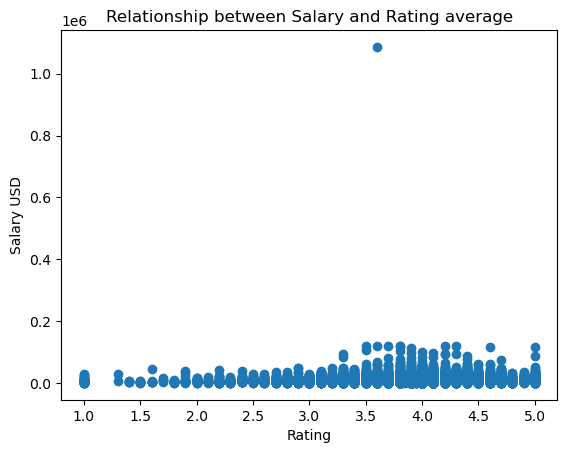

In [31]:
plt.scatter('Rating', 'Salary USD', data=sps)
plt.xlabel('Rating')
plt.ylabel('Salary USD')
plt.title('Relationship between Salary USD and Rating average')
plt.show()

In [42]:
sps.groupby('Company Name', as_index=False).agg({'Rating':'mean', 'Salary USD':'sum'}).sort_values('Salary USD', ascending=False)

,Company Name,Rating,Salary USD
660,Amazon,3.800000,2.624006e+06
9161,Tata Consultancy Services,3.899631,1.675547e+06
5832,Microsoft,4.400000,1.674629e+06
313,Accenture,4.100000,1.119384e+06
9414,Thapar University,3.600000,1.086570e+06
...,...,...,...
8168,Scholify,4.100000,1.448760e+02
341,Acmatics Technologies,3.500000,1.448760e+02
10316,Webboombaa,4.300000,1.448760e+02
9,....,4.000000,1.448760e+02


In [27]:
#It looks to be Amazon the Company out of range in the above relationship in a relation with the other Companies